In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in the data

DATA_PATH = '../data/'
DATA_FILE = 'vgsales.csv'

df = pd.read_csv(DATA_PATH + DATA_FILE)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [24]:
# defining the generations

generations = {
    '80s': ['2600', 'NES', 'SNES', 'GB', 'GEN', 'TG16', '3DO', 'GG', 'NG', 'WS', 'SCD', 'SAT', 'PCFX'],
    '90s': ['N64', 'PS', 'GBA', 'DC', 'PS2', 'PSP', 'XB', 'GC'],
    '2000s': ['Wii', 'DS', 'PS3', 'X360'],
    '2010s': ['WiiU', '3DS', 'PS4', 'XOne', 'PSV'],
    'PC': ['PC']
}

# creating a new column for the generation

def get_generation(platform):
    for i, gen in enumerate(generations.values()):
        if platform in gen:
            return i
        
    return -1

df['Generation'] = df.Platform.apply(get_generation)

colors = ['#264653', '#005f60', '#287271', '#008083', '#2a9d8f', '#8ab17d', '#babb74', '#e9c46a', '#efb366', '#f4a261', '#ee8959', '#e76f51']

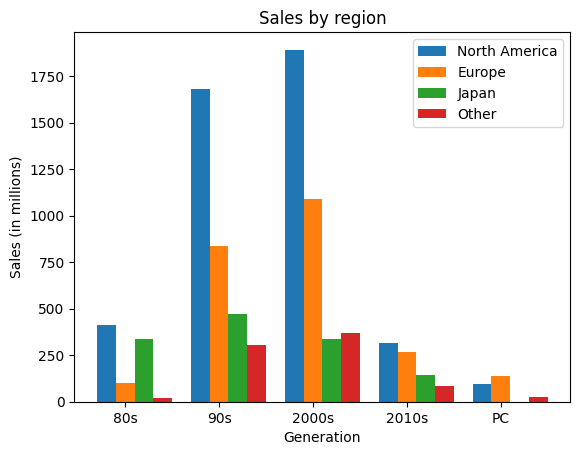

In [4]:
# total sales of games by region

sales_na = df.groupby('Generation')['NA_Sales'].sum()
sales_eu = df.groupby('Generation')['EU_Sales'].sum()
sales_jp = df.groupby('Generation')['JP_Sales'].sum()
sales_ot = df.groupby('Generation')['Other_Sales'].sum()

# plottin the data

barWidth = 0.2

na_pos = np.arange(len(sales_na.index))
eu_pos = [x + barWidth for x in na_pos]
jp_pos = [x + barWidth for x in eu_pos]
ot_pos = [x + barWidth for x in jp_pos]

plt.bar(na_pos, sales_na, barWidth, label='North America')
plt.bar(eu_pos, sales_eu, barWidth, label='Europe')
plt.bar(jp_pos, sales_jp, barWidth, label='Japan')
plt.bar(ot_pos, sales_ot, barWidth, label='Other')

plt.xticks([r + barWidth for r in range(len(sales_na.index))], generations.keys())
plt.xlabel('Generation')
plt.ylabel('Sales (in millions)')
plt.title('Sales by region')

plt.legend()
plt.show()

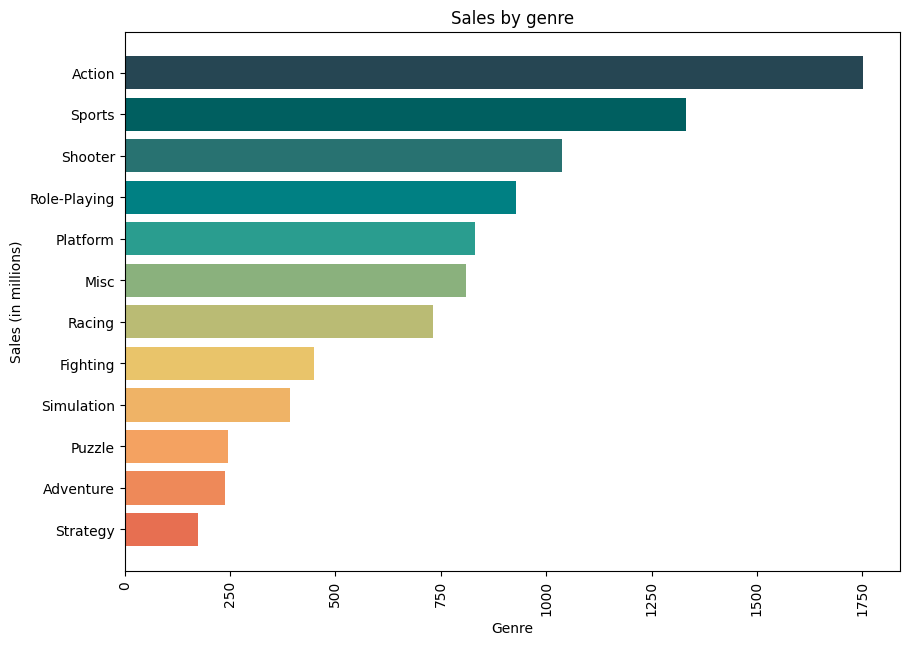

In [5]:
# sales by genre

genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=True)

colors = ['#e76f51', '#ee8959', '#f4a261', '#efb366', '#e9c46a', '#babb74', '#8ab17d', '#2a9d8f', '#008083', '#287271', '#005f60', '#264653']

plt.figure(figsize=(10, 7))
plt.barh(genre_sales.index, genre_sales, color=colors)

plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Sales (in millions)')
plt.title('Sales by genre')

plt.show()

Text(0.53, 0.94, 'Sales by Genre over the years')

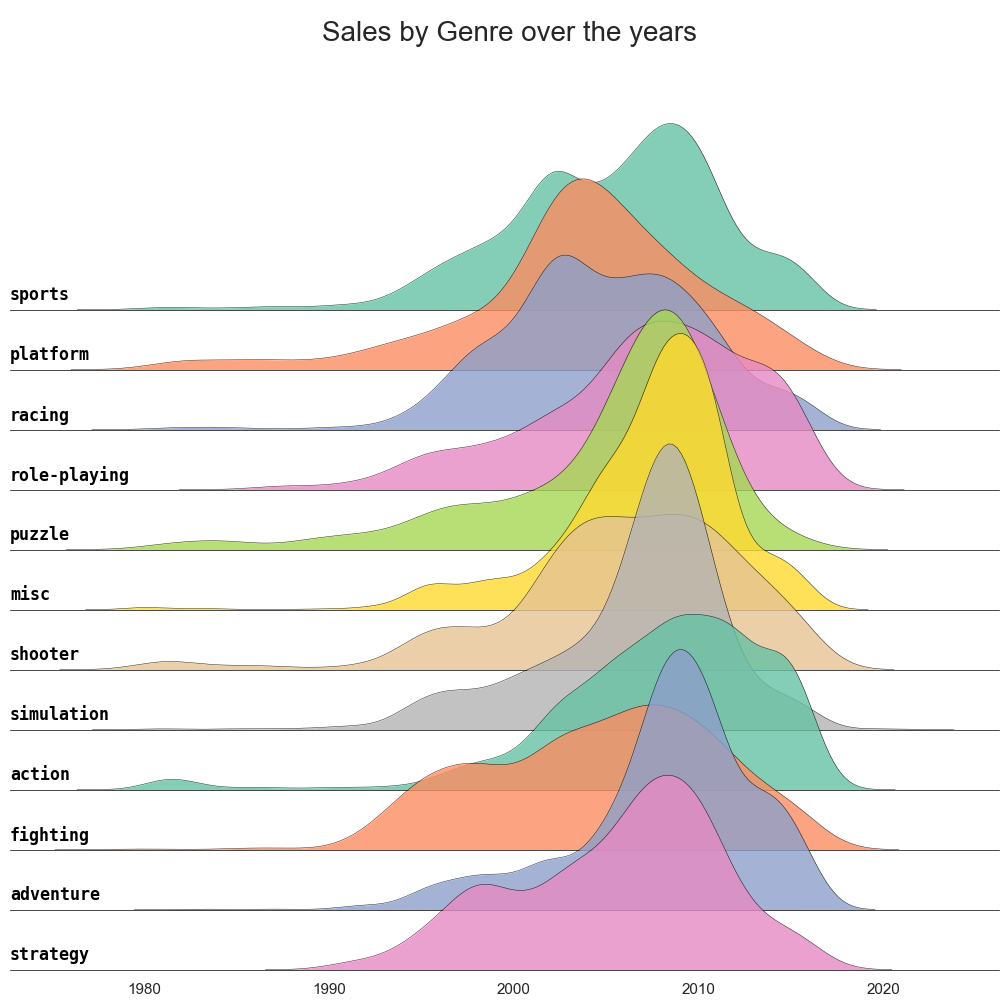

In [7]:
# sales by genre over the years
pal = sns.color_palette("Set2", 12)

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth': 0.5, 'axes.edgecolor': 'black'})
g = sns.FacetGrid(df, row="Genre", hue="Genre", aspect=12, height=.9, palette=pal)
g.map_dataframe(sns.kdeplot, x="Year", fill=True, alpha=.8, linewidth=0)
g.map_dataframe(sns.kdeplot, x="Year", color='black', linewidth=.4, clip_on=False, alpha=.8)

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, 0.05, label.lower(), color='black', fontsize=12,
            ha="left", va="center", transform=ax.transAxes, fontweight='bold', fontfamily='monospace')

g.map(label, "Genre")

g.fig.subplots_adjust(hspace=-.8,top=0.95)
g.set_titles("")
g.set(yticks=[], xlabel="", ylabel="")
g.despine(left=True)
plt.suptitle('Sales by Genre over the years', x=.53, y=0.94, fontsize=20, ha='center')


/var/folders/w2/b__h2xp91v50w69x68jwzs140000gn/T/ipykernel_77411/1176950626.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 3, i+1)


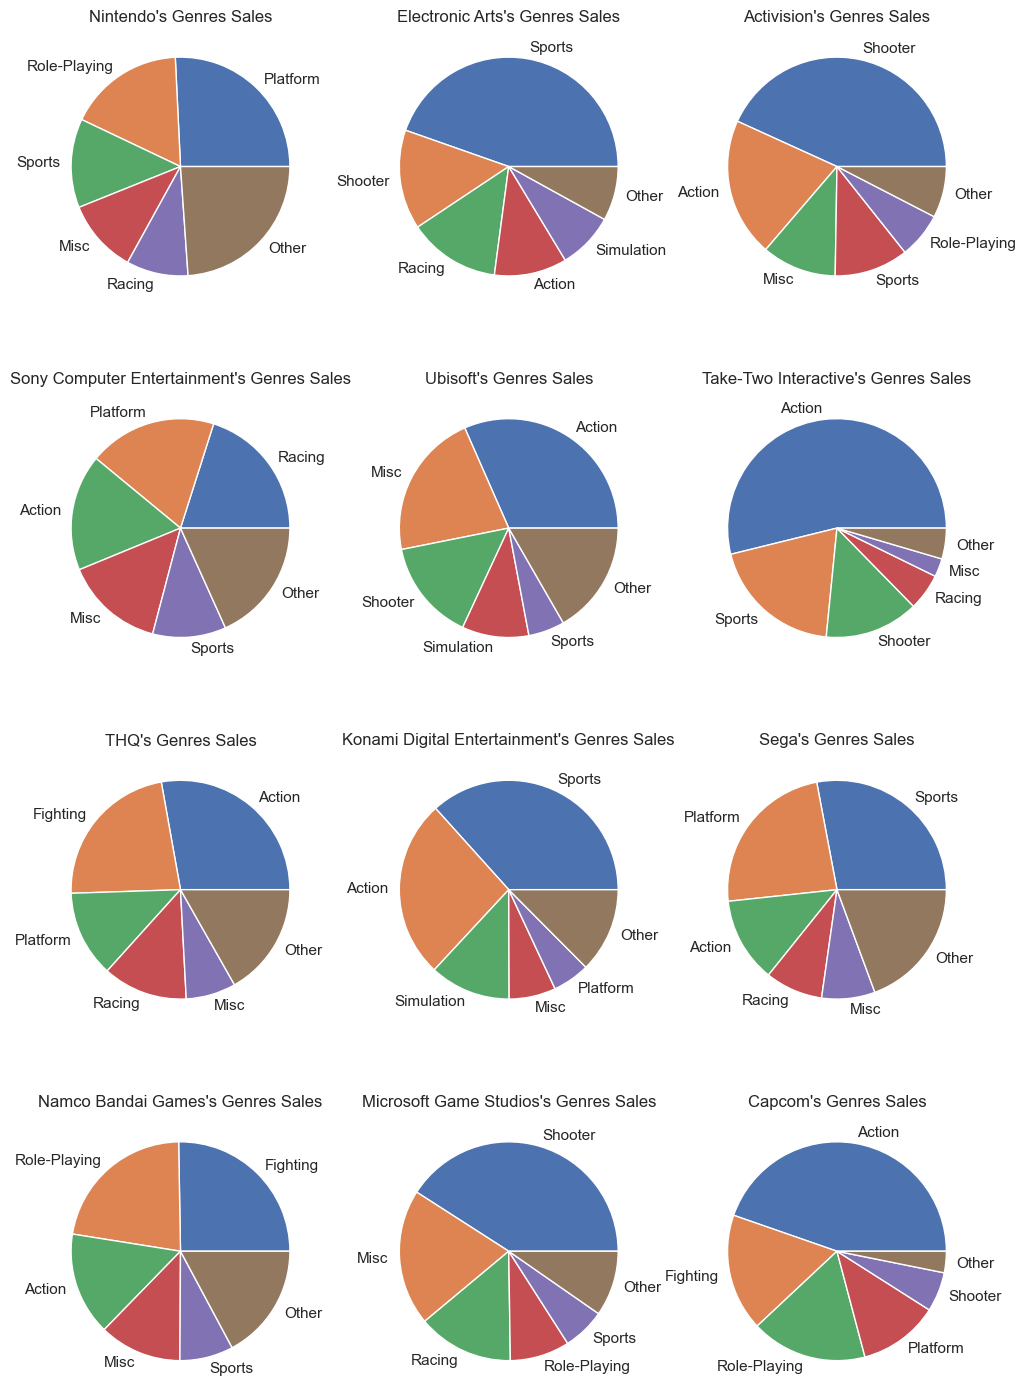

In [23]:
# top 10 publishers and their genres
top_publishers = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)[:12]
top_publishers_genre = df.groupby(['Publisher', "Genre"])['Global_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 18))
plt.title('Top 12 Publishers and their Genres')
# creating pie charts for each publisher
for i, (publisher) in enumerate(top_publishers.index):
    plt.subplot(4, 3, i+1)
    publish_sales = top_publishers_genre.loc[publisher]

    total_other = 0
    for i, (genre, sales) in enumerate(publish_sales.items()):
        if i > 5:
            total_other += sales
            
    publish_sales = publish_sales[:5]
    publish_sales['Other'] = total_other
    
    plt.pie(publish_sales, labels=publish_sales.index)
    plt.title(f'{publisher}\'s Genres Sales')

plt.show()

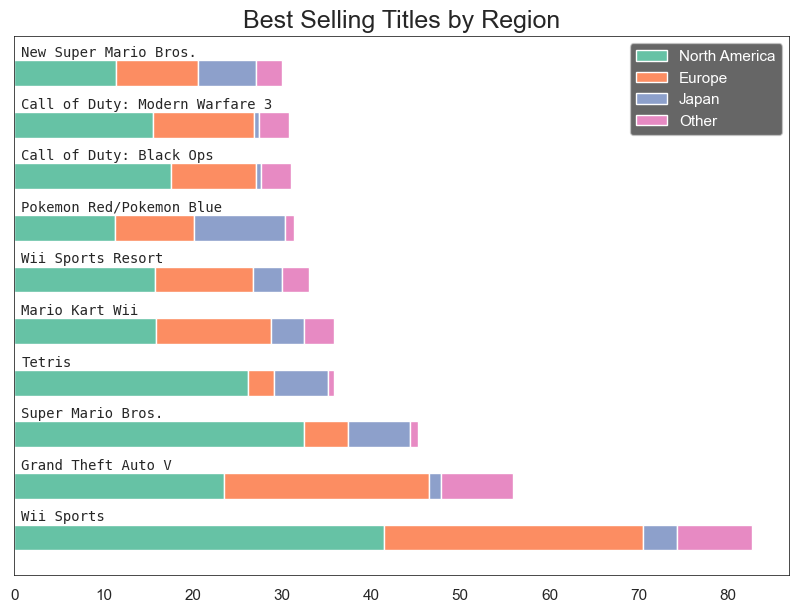

In [127]:
# best selling titles by region

total_sales = df.groupby('Name')['Global_Sales'].sum().sort_values(ascending=False)[:10]
na_sales = df.groupby('Name')['NA_Sales'].sum().sort_values(ascending=False)
eu_sales = df.groupby('Name')['EU_Sales'].sum().sort_values(ascending=False)
jp_sales = df.groupby('Name')['JP_Sales'].sum().sort_values(ascending=False)
ot_sales = df.groupby('Name')['Other_Sales'].sum().sort_values(ascending=False)

# plottin the data

barWidth = 0.5

# collorpallet
pal = sns.color_palette("Set2", 4)

fig, ax = plt.subplots(figsize=(10, 7))
plt.title('Best Selling Titles by Region', fontsize=18)

for i, (title) in enumerate(total_sales.index):
    ax.annotate(title, (.8, i+.4), fontsize=10, fontfamily='monospace', va='center')
    ax.barh(i, na_sales[title], barWidth, label='North America', color=pal[0])
    ax.barh(i, eu_sales[title], barWidth, label='Europe', left=na_sales[title], color=pal[1])
    ax.barh(i, jp_sales[title], barWidth, label='Japan', left=na_sales[title]+eu_sales[title], color=pal[2])
    ax.barh(i, ot_sales[title], barWidth, label='Other', left=na_sales[title]+eu_sales[title]+jp_sales[title], color=pal[3])

plt.yticks(np.arange(10), "", fontsize=8)
plt.legend(["North America", "Europe", "Japan", "Other"], labelcolor='white', framealpha=.6)
plt.show()